In [155]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
from concurrent.futures import ProcessPoolExecutor, Future
from itertools import product

from utils import *

mpl.rcParams.update(rcParams)
mpl.rcParams['figure.dpi'] = 100

In [156]:
config_name = 'lagrange2'
conf = load_conf(config_name)

In [157]:
# Position Lagrange 2
G: float = 6.674e-11
d: float = 149.598023e9
ms: float = conf['m1']
mt: float = conf['m2']
xs = -mt * d / (mt + ms)
xt = ms * d / (mt + ms)
Omega = np.sqrt(G * ms / (d**2 * xt))
Omega2 = Omega**2
au = 1.495978707e11  # m / au

coefs = [
    Omega2,
    -2 * Omega2 * (xs+xt),
    Omega2 * ((xt + xs)**2 + 2 * xt * xs),
    -(G * (ms + mt) + 2 * Omega2 * xt * xs * (xt + xs)),
    2 * G * (ms * xt + mt * xs) + Omega2 * xt**2 * xs**2,
    -G * (ms * xt**2 + mt * xs**2)
]
roots = np.roots(coefs)
assert roots[2].imag == 0.0
L2x = roots[2].real

In [158]:
def potential(x: float | np.ndarray, y: float | np.ndarray):
    # return x**2 + y**2
    return (
        -1.0 / 2.0 * Omega2 * (x**2 + y**2)
        # + Omega * (vy * x - vx * y)
        - G * ms / np.sqrt((x - xs)**2 + (y)**2)
        - G * mt / np.sqrt((x - xt)**2 + (y)**2)
    )

# Global

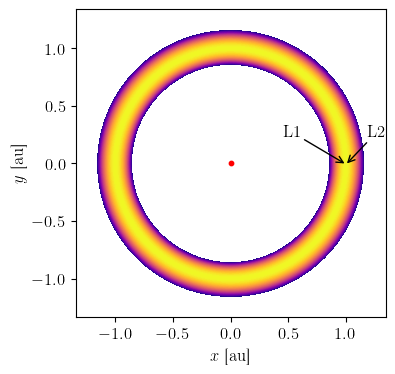

In [168]:
%matplotlib inline
x0 = 0
y0 = 0
bounds = 2e11
x, y = np.meshgrid(
    np.linspace(x0-bounds, x0+bounds, 4000),
    np.linspace(y0-bounds, y0+bounds, 4000)
)
z = potential(x, y)
z = np.ma.masked_outside(z, -1.36e9, -1.1e9)

fig, ax = plt.subplots()
fig.set_size_inches((4, 4))
thing = ax.contourf(x/au, y/au, z/1e9, 100, cmap='plasma')

ax.scatter(xs/au, 0, s=10, marker='o', color='red', label='Sun')

ax.annotate('L1', ((xt - (L2x - xt))/au, 0), zorder=10, ha='center', va='center', textcoords='axes fraction', xytext=(0.7, 0.6), arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0))
ax.annotate('L2', (L2x/au, 0), zorder=10, ha='center', va='center', textcoords='axes fraction', xytext=(0.97, 0.6), arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0))

ax.set_xlabel(r'$x$ [au]')
ax.set_ylabel(r'$y$ [au]')
ax.axis('equal')

# fig.colorbar(thing, ax=ax)
# fig.legend()
plt.savefig(export_path + 'potential_global.png', dpi=300)
plt.show()

# Zoomed

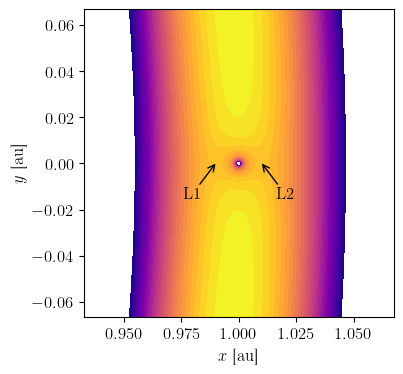

In [167]:
%matplotlib inline
x0 = xt
y0 = 0
bounds = 1e10
x, y = np.meshgrid(
    np.linspace(x0-bounds, x0+bounds, 4000),
    np.linspace(y0-bounds, y0+bounds, 4000)
)
z = potential(x, y)
z = np.ma.masked_outside(z, -1.3338e9, -1.1e9)

fig, ax = plt.subplots()
fig.set_size_inches((4, 4))
thing = ax.contourf(x/au, y/au, z/1e9, 30, cmap='plasma')

ax.annotate('L1', ((xt - (L2x - xt))/au, 0), zorder=10, ha='center', va='center', textcoords='axes fraction', xytext=(0.35, 0.4), arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0))
ax.annotate('L2', (L2x/au, 0), zorder=10, ha='center', va='center', textcoords='axes fraction', xytext=(0.65, 0.4), arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0))

ax.set_xlabel(r'$x$ [au]')
ax.set_ylabel(r'$y$ [au]')
ax.axis('equal')

# fig.colorbar(thing, ax=ax)
# fig.legend()
plt.savefig(export_path + 'potential_L1_L2_zoom.png', dpi=300)
plt.show()

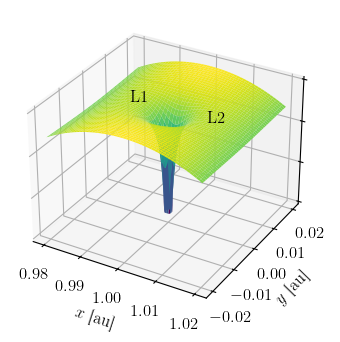

In [166]:
%matplotlib inline
x0 = xt
y0 = 0
bounds = 3e9
x, y = np.meshgrid(
    np.linspace(x0-bounds, x0+bounds, 4000),
    np.linspace(y0-bounds, y0+bounds, 4000)
)
z = potential(x, y)
z = np.ma.masked_outside(z, -1.3338e9, -1.1e9)

plt.figure(figsize=(4, 4), )
ax = plt.subplot(projection='3d')
thing = ax.plot_surface(x/au, y/au, z/1e9, cmap='viridis', zorder=1)

ax.text((2*xt - L2x)/au, 0, potential(2*xt - L2x, 0)/1e9, 'L1', zorder=10)
ax.text(L2x/au, 0, potential(L2x, 0)/1e9, 'L2', zorder=10)

ax.set_xlabel(r'$x$ [au]')
ax.set_ylabel(r'$y$ [au]')
ax.set_zlabel(r'$z$ [$\sim J$]')
ax.set_zlim(-1.334, -1.331)
ax.set_zticklabels([])

plt.savefig(export_path + 'potential3D_L1_L2_zoom.png', dpi=300)
plt.show()